In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import os

In [3]:
def read_data(*args):
    dfs = [pd.read_csv(os.path.join("results", a + ".csv")) for a in args]
    res = pd.concat(dfs)
    res["benchmark"] = res["benchmark"].astype(str)
    return res


def _get(df, mode, key=None):
    res = df[df["mode"] == mode].sort_values('benchmark')
    if key is not None:
        res = np.array(res[key])
    return res


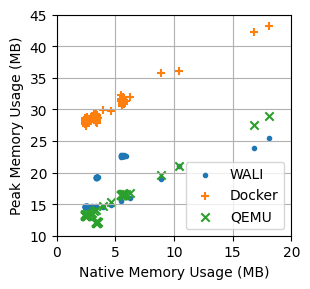

In [6]:
df = read_data("lua", "bash", "sqlite3")

modes = {
    "wali": "WALI",
    "qemu": "QEMU",
}

fig, axs = plt.subplots(1, 1, figsize=(3.2, 3))

x = _get(df, "native", "maxrss")

axs.scatter(
    x / 1000, _get(df, 'wali', "maxrss") / 1000, marker='.', label='WALI')

y = _get(df, "docker", "maxrss") + _get(df, "docker-inner", "maxrss")
axs.scatter(x / 1000, y / 1000, marker='+', label="Docker")

axs.scatter(
    x / 1000, _get(df, 'qemu', "maxrss") / 1000, marker='x', label='QEMU')


# axs.plot([0, 5], [0, 5], linestyle='--', color='gray', label='Native')

axs.legend()
axs.set_xlim(0, 20)
axs.set_ylim(10, 45)
axs.set_xlabel("Native Memory Usage (MB)")
axs.set_ylabel("Peak Memory Usage (MB)")
axs.grid()
fig.tight_layout()
fig.savefig("figures/memory.pdf")

In [8]:
modes = {
    "wali": "WALI",
    # "docker-inner": "Docker -Launch",
    "docker": "Docker",
    "qemu": "QEMU"
}

def lrscatter(ax, df, xlim=None, ylim=None, limit=5):
    def _scatterlr(ax, x, y, marker='.', label=''):
        filter = (np.array(x) < 4) & (np.array(y) < 4)
        lr = linregress(x[filter], y[filter])
        ax.scatter(x, y, marker=marker, label=label)
        ax.plot([0, 4], [lr.intercept, lr.intercept + 4 * lr.slope])
        print(label, lr.intercept, lr.slope)

    x = _get(df, "native", "wall")
    markers = ['.', '+', 'x', '1']
    for (name, label), marker in zip(modes.items(), markers):
        _scatterlr(ax, x, _get(df, name, "wall"), marker=marker, label=label)

    ax.grid()
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.plot(
        [-100, 100], [-100, 100], linestyle='--', color='gray', label='Native')


def _sharey(axs):
    for ax in axs[1:]:
        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)


WALI 0.034805056196113515 1.9933479857343466
Docker 0.4927976537355768 1.6392163037950043
QEMU 0.035184799541184475 9.861408843163314
WALI -0.00681013846837919 2.191425734168434
Docker 0.5094778316952688 1.0514675279552443
QEMU -0.08365386554739507 10.984512191408612
WALI 0.018055681704942872 2.3134812602255654
Docker 0.48593074812611126 1.2769012622737
QEMU 0.03914452565334692 10.017238511423123


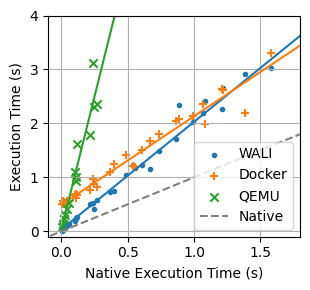

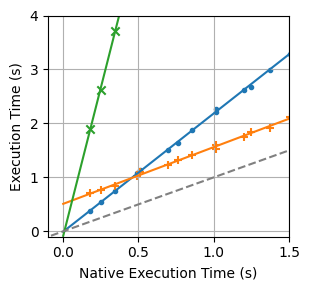

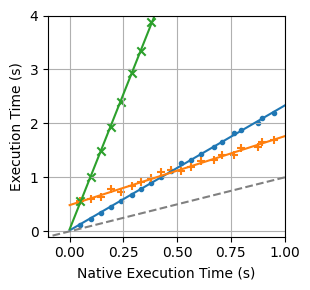

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(3.2, 3))
lrscatter(ax, read_data("lua"), limit=4, xlim=(-0.1, 1.8), ylim=(-0.1, 4))
ax.set_ylabel("Execution Time (s)")
ax.set_xlabel("Native Execution Time (s)")
ax.legend()
fig.tight_layout()
fig.savefig("figures/runtime_a.pdf")

fig, ax = plt.subplots(1, 1, figsize=(3.2, 3))
lrscatter(ax, read_data("bash"), limit=4, xlim=(-0.1, 1.5), ylim=(-0.1, 4))
ax.set_ylabel("Execution Time (s)")
ax.set_xlabel("Native Execution Time (s)")
fig.tight_layout()
fig.savefig("figures/runtime_b.pdf")

fig, ax = plt.subplots(1, 1, figsize=(3.2, 3))
lrscatter(ax, read_data("sqlite3"), limit=4, xlim=(-0.1, 1.0), ylim=(-0.1, 4))
ax.set_ylabel("Execution Time (s)")
ax.set_xlabel("Native Execution Time (s)")
fig.tight_layout()
fig.savefig("figures/runtime_c.pdf")

# lrscatter(axs[1], read_data("bash"), limit=4, xlim=(-0.1, 1.5), ylim=(-0.1, 4))
# lrscatter(axs[2], read_data("sqlite3"), limit=4, xlim=(-0.1, 1.0), ylim=(-0.1, 4))


WALI 0.018055681704942872 2.3134812602255654
Docker -Launch 0.010431690268940308 1.2101981450722559
Docker 0.48593074812611126 1.2769012622737
QEMU 0.07937855355886647 9.899438937915418


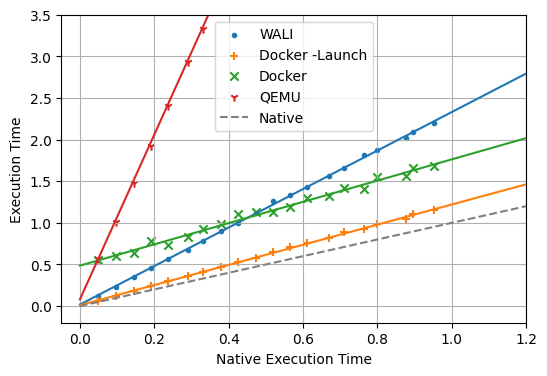

In [12]:
df = read_data("sqlite3")

def _scatterlr(ax, x, y, marker='.', label='', limit=4):
    filter = (np.array(x) < limit) & (np.array(y) < limit)
    lr = linregress(x[filter], y[filter])
    ax.scatter(x, y, marker=marker, label=label)
    ax.plot([0, 4], [lr.intercept, lr.intercept + 4 * lr.slope])
    print(label, lr.intercept, lr.slope)

modes = {
    "wali": "WALI",
    "docker-inner": "Docker -Launch",
    "docker": "Docker",
    "qemu": "QEMU"
}

fig, axs = plt.subplots(1, 1, figsize=(6, 4))
axs.set_xlabel("Native Execution Time")
axs.set_ylabel("Execution Time")


x = _get(df, "native", "wall")
markers = ['.', '+', 'x', '1']
for (name, label), marker in zip(modes.items(), markers):
    _scatterlr(
        axs, x, _get(df, name, "wall"), marker=marker,
        label=label, limit=100)

axs.plot([0, 5], [0, 5], linestyle='--', color='gray', label='Native')

axs.legend()
axs.set_xlim(-0.05, 1.2)
axs.set_ylim(-0.2, 3.5)
axs.set_xlabel("Native Execution Time")
axs.set_ylabel("Execution Time")
axs.grid()
fig.savefig("scatter.pdf")